# Baseline

In [93]:
#######################################
## Import Libraries
#######################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_val_score, GridSearchCV  #Additional scklearn functions

In [35]:
#######################################
## Pandas Settings
#######################################

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [36]:
#######################################
## Load Files
#######################################

train = pd.read_csv('./data/train.csv',header=None)
train_labels = pd.read_csv('./data/trainLabels.csv',header=None,names=['target'])
test = pd.read_csv('./data/test.csv',header=None)

# Let's join train with train_labels
train_ = pd.concat([train,train_labels],axis=1)

print('Train: %s\nTrain Labels: %s\nTest: %s\nTrain_: %s'%(train.shape,train_labels.shape,test.shape,train_.shape))

Train: (1000, 40)
Train Labels: (1000, 1)
Test: (9000, 40)
Train_: (1000, 41)


In [37]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,-1.408370,1.114744,0.910415,2.218110,4.305643,0.088924,0.169149,0.413448,1.513862,2.662967,-1.072765,0.149111,0.559579,4.378885,-0.463603,-0.063959,0.544930,0.712772,-1.494050,-2.636169,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,-0.713474,-0.136399,0.058990,-1.083458,1.622659,-1.685582,-1.222879,-0.215834,0.155612,0.627873,-0.732789,1.337941,1.335689,0.680062,0.504754,1.204808,0.144477,0.673993,1.027921,3.073382,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,-0.416575,0.433862,-12.822821,-0.048248,-5.031497,-0.704413,0.515952,-2.635899,-2.359881,-0.053400,0.741432,1.573043,0.723686,1.735602,0.335774,0.572905,0.625971,0.412084,-4.883833,-5.588332,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [38]:
train_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,target
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,-1.408370,1.114744,0.910415,2.218110,4.305643,0.088924,0.169149,0.413448,1.513862,2.662967,-1.072765,0.149111,0.559579,4.378885,-0.463603,-0.063959,0.544930,0.712772,-1.494050,-2.636169,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,-0.713474,-0.136399,0.058990,-1.083458,1.622659,-1.685582,-1.222879,-0.215834,0.155612,0.627873,-0.732789,1.337941,1.335689,0.680062,0.504754,1.204808,0.144477,0.673993,1.027921,3.073382,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,-0.416575,0.433862,-12.822821,-0.048248,-5.031497,-0.704413,0.515952,-2.635899,-2.359881,-0.053400,0.741432,1.573043,0.723686,1.735602,0.335774,0.572905,0.625971,0.412084,-4.883833,-5.588332,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


In [39]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,-0.247797,1.527068,3.359963,1.172500,1.823865,0.032365,-0.506474,0.116775,0.302796,-0.069677,-1.067652,0.268855,-2.114816,-2.829966,-0.379520,2.498289,-0.943095,0.826023,0.738353,-1.250244,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,-0.392141,0.396406,-6.404201,0.892782,-0.277077,-2.277002,0.020142,0.244746,-3.129533,0.646215,0.596033,-0.183858,-1.724840,-4.744641,0.735539,1.987149,0.308611,0.191700,-3.309266,-1.474186,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,-1.152022,0.219019,-1.660207,1.830836,-2.055934,0.361885,0.406346,1.473729,1.697615,0.212823,-0.126665,-0.267433,-2.318000,-2.978056,0.122586,0.411849,-0.591939,-0.112360,-3.033888,-2.880890,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,1.274083,0.482342,-2.988552,-1.349692,-2.031105,0.332186,-1.521289,1.393053,-3.750689,-0.694236,0.363548,-0.585731,0.418254,-1.539170,0.566453,0.122639,1.206677,-0.832908,-0.384298,-3.082768,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,0.583663,-0.157686,-4.037594,-0.449152,1.791508,1.822303,0.287224,1.059293,-0.882400,-0.327075,-0.875657,-0.452281,-2.777583,-4.731511,0.639890,0.985756,0.577993,0.759287,-1.359054,1.191917,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [40]:
#######################################
## Data Types and Null Values
#######################################

print(train_.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
0         1000 non-null float64
1         1000 non-null float64
2         1000 non-null float64
3         1000 non-null float64
4         1000 non-null float64
5         1000 non-null float64
6         1000 non-null float64
7         1000 non-null float64
8         1000 non-null float64
9         1000 non-null float64
10        1000 non-null float64
11        1000 non-null float64
12        1000 non-null float64
13        1000 non-null float64
14        1000 non-null float64
15        1000 non-null float64
16        1000 non-null float64
17        1000 non-null float64
18        1000 non-null float64
19        1000 non-null float64
20        1000 non-null float64
21        1000 non-null float64
22        1000 non-null float64
23        1000 non-null float64
24        1000 non-null float64
25        1000 non-null float64
26        1000 non-null float64
27        1000 non-null float6

In [41]:
#######################################
## Main Statistic Parameters
#######################################

train_.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,-0.016250,-0.038010,-1.985616,0.012374,-0.029229,-0.039307,-0.004091,-0.032836,0.428313,0.043427,0.073461,-0.005140,0.912288,0.902301,-0.023110,0.047473,-0.041117,0.012985,-0.395782,0.123921,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,1.026325,0.985889,4.528096,0.995652,2.164547,1.002481,0.970401,1.000130,2.176020,0.987689,0.967282,0.980319,2.178778,4.241903,1.019566,0.995752,0.998182,1.030610,2.296818,2.410453,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,-3.304074,-3.157436,-14.706080,-3.002151,-6.790633,-2.914729,-3.464048,-2.944093,-8.258306,-3.423875,-4.251382,-2.822644,-6.337522,-16.156070,-3.218446,-2.820792,-3.023811,-3.054384,-8.034421,-7.105723,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,-0.713704,-0.730293,-5.094964,-0.694081,-1.441443,-0.757619,-0.668335,-0.727001,-0.983595,-0.594638,-0.588171,-0.698036,-0.542526,-1.822188,-0.720837,-0.617001,-0.668062,-0.696411,-1.936374,-1.562374,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,0.019479,-0.075950,-2.103532,-0.005946,-0.033219,-0.019046,0.008360,-0.011366,0.488217,0.082688,0.094307,-0.004404,1.050071,0.970403,-0.012183,0.014636,-0.017535,0.039219,-0.489296,-0.040604,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,0.709416,0.644553,1.186164,0.664921,1.492611,0.678748,0.674583,0.588732,1.915022,0.711525,0.727896,0.673427,2.367748,3.825862,0.671318,0.731892,0.642797,0.706336,1.044188,1.614308,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,3.409653,3.253032,12.186445,3.737423,6.959736,3.100935,2.805197,3.291544,7.074432,3.343812,2.938033,3.053262,8.096838,14.373681,2.981582,3.662800,3.293911,3.069885,7.413173,8.812739,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


In [42]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,-0.003660,-0.007303,-1.957133,-0.004248,0.011643,0.003135,-0.018562,-0.009417,0.510326,0.000702,-0.012717,-0.002739,0.989481,1.020193,0.015474,-0.011020,0.010204,0.012467,-0.471728,0.024984,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,1.004065,0.991179,4.533104,0.995835,2.191789,0.994510,1.000388,0.997070,2.151945,0.991179,0.996096,0.991786,2.197387,4.427654,0.995459,0.993179,0.999074,1.004399,2.277023,2.364822,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,-3.796604,-3.550368,-18.354435,-3.881205,-7.307972,-3.999426,-3.942103,-3.807788,-7.649233,-3.690923,-3.709619,-3.514073,-8.027128,-16.034095,-4.213462,-3.642803,-4.380993,-3.530042,-8.298598,-8.016904,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,-0.676108,-0.682887,-5.094238,-0.687180,-1.496236,-0.669166,-0.699755,-0.674884,-0.876184,-0.673208,-0.694344,-0.696292,-0.464890,-1.820445,-0.671986,-0.687161,-0.656783,-0.667406,-1.982627,-1.607159,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,-0.000775,-0.009851,-2.179444,-0.007412,-0.003044,0.005731,-0.022107,-0.014678,0.557244,0.007481,-0.005231,0.006436,0.990320,1.028496,0.009085,-0.014946,0.017904,0.016989,-0.586710,-0.110860,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,0.690303,0.667126,1.097400,0.664078,1.550678,0.680350,0.665828,0.658917,1.962271,0.667735,0.640409,0.670511,2.429367,3.977142,0.691572,0.655649,0.673151,0.688082,0.952552,1.534970,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,3.403080,3.902968,15.727476,4.126432,8.251939,3.761319,3.454845,3.818457,8.642905,3.685600,4.235300,3.834814,9.288831,20.152382,3.609254,3.492944,3.775659,4.126777,8.243573,11.355404,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


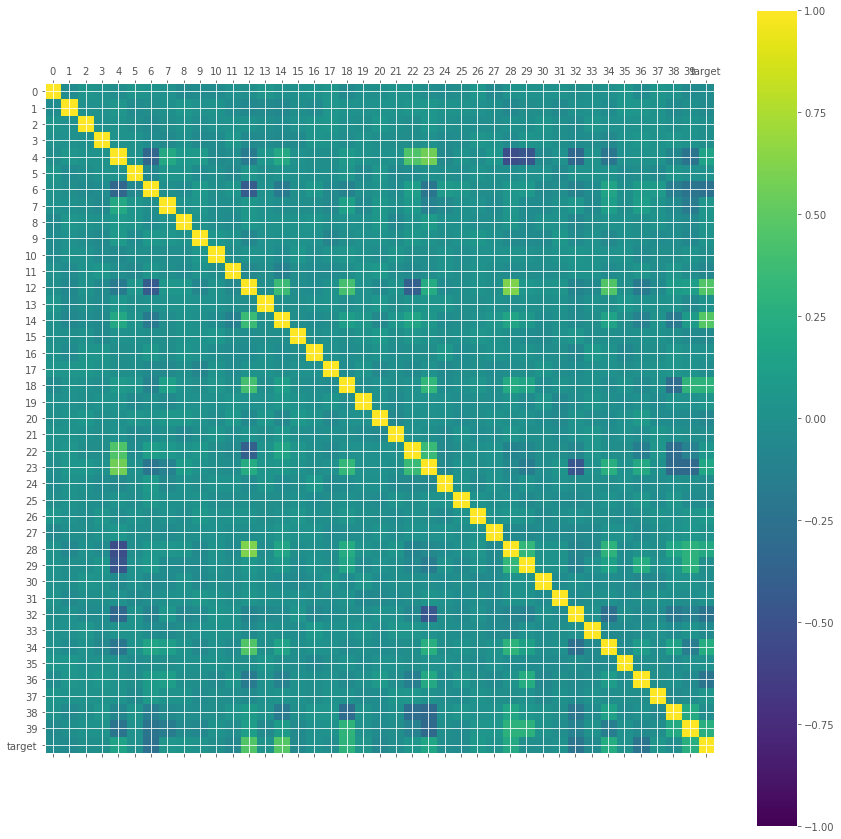

In [43]:
#######################################
## Correlation Matrix
#######################################

correlations = train_.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_.columns.tolist()),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_.columns.tolist())
ax.set_yticklabels(train_.columns.tolist())
plt.show()

## Train Test Split

In [45]:
#######################################
## Train Test Split
#######################################

from sklearn.model_selection import train_test_split
# X and y
X = train
y = train_labels['target']
# X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 4) 

## Models

### 1. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)  # Training our model
# Predict
y_pred = logreg.predict(X_test) # ex:arr([2]) predict class 2
y_pred_prob = logreg.predict_proba(X_test) # ex:arr([[0.01,0.19,0.8]])predict class 2

/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 1.1 Metrics

In [47]:
max(y_test.mean(), 1 - y_test.mean())

0.5033333333333333

In [48]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.8333333333333334

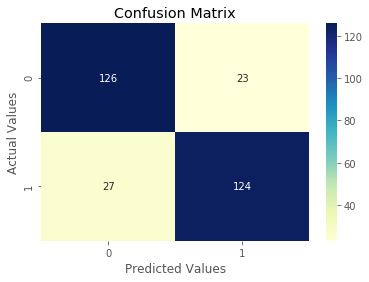

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True, fmt="d",cmap="YlGnBu")
ax.set(xlabel='Predicted Values', ylabel='Actual Values',title='Confusion Matrix');

### 1.2 Submission

In [50]:
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(test)

/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
sub_logreg = pd.DataFrame()
sub_logreg['Id'] = range(len(test))
sub_logreg['Id'] = sub_logreg['Id'] + 1
sub_logreg['Solution'] = y_pred

In [62]:
sub_logreg.head()

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [63]:
sub_logreg.to_csv('./submissions/sub_logreg.csv',index=False)

### 2. KNeighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn # print this you’ll see all the default values
knn.fit(X_train,y_train) # Training our model
y_pred=knn.predict(X_test) # ex:arr([2]) predict class 2
y_pred_prob = knn.predict_proba(X_test) # ex:arr([[0,0,1]])predict class 2

### 2.1 Metrics

In [65]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.88

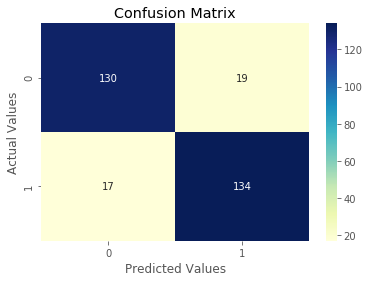

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True, fmt="d",cmap="YlGnBu")
ax.set(xlabel='Predicted Values', ylabel='Actual Values',title='Confusion Matrix');

### 2.2 Tuning Parameters

In [68]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X, y, cv=5, scoring='accuracy')

array([0.925, 0.895, 0.905, 0.88 , 0.895])

In [69]:
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.9

K = 1, Score_mean = 0.8879999999999999
K = 2, Score_mean = 0.8880000000000001
K = 3, Score_mean = 0.9109999999999999
K = 4, Score_mean = 0.9029999999999999
K = 5, Score_mean = 0.906
K = 6, Score_mean = 0.909
K = 7, Score_mean = 0.9109999999999999
K = 8, Score_mean = 0.901
K = 9, Score_mean = 0.9029999999999999
K = 10, Score_mean = 0.9039999999999999
K = 11, Score_mean = 0.901
K = 12, Score_mean = 0.9049999999999999
K = 13, Score_mean = 0.9019999999999999
K = 14, Score_mean = 0.898
K = 15, Score_mean = 0.8949999999999999
K = 16, Score_mean = 0.897
K = 17, Score_mean = 0.89
K = 18, Score_mean = 0.8960000000000001
K = 19, Score_mean = 0.889
K = 20, Score_mean = 0.885
K = 21, Score_mean = 0.8869999999999999
K = 22, Score_mean = 0.884
K = 23, Score_mean = 0.883
K = 24, Score_mean = 0.885
K = 25, Score_mean = 0.881
K = 26, Score_mean = 0.883
K = 27, Score_mean = 0.883
K = 28, Score_mean = 0.8780000000000001
K = 29, Score_mean = 0.877
K = 30, Score_mean = 0.8779999999999999


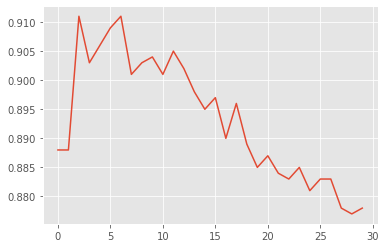

In [74]:
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    print('K = %s, Score_mean = %s'%(k,scores.mean()))
    
plt.plot(k_scores)

In [76]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.9109999999999999

### 2.3 Submission

In [83]:
knn = KNeighborsClassifier(n_neighbors=7)
knn # print this you’ll see all the default values
knn.fit(X,y) # Training our model
y_pred=knn.predict(test) # ex:arr([2]) predict class 2

In [84]:
sub_knn = pd.DataFrame()
sub_knn['Id'] = range(len(test))
sub_knn['Id'] = sub_knn['Id'] + 1
sub_knn['Solution'] = y_pred

In [85]:
sub_knn.to_csv('./submissions/sub_knn.csv',index=False)

### 3. KNeighbours adding feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

std = StandardScaler()
X_std = std.fit_transform(X)
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
norm = Normalizer()
X_norm = norm.fit_transform(X)

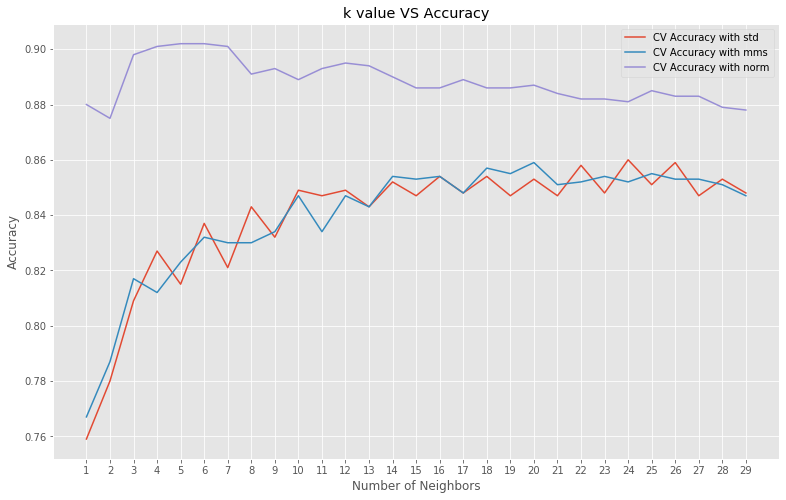

Best Accuracy with feature scaling: 0.9019999999999999
Best kNN classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Best scaling: norm


In [87]:
# Model complexity
neig = np.arange(1, 30)
kfold = 10
val_accuracy = {'std':[], 'mms':[], 'norm':[]}
bestKnn = None
bestAcc = 0.0
bestScaling = None
# Loop over different values of k
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    # validation accuracy
    s1 = np.mean(cross_val_score(knn, X_std, y, cv=kfold))
    val_accuracy['std'].append(s1)
    s2 = np.mean(cross_val_score(knn, X_mms, y, cv=kfold))
    val_accuracy['mms'].append(s2)
    s3 = np.mean(cross_val_score(knn, X_norm, y, cv=kfold))
    val_accuracy['norm'].append(s3)
    if s1 > bestAcc:
        bestAcc = s1
        bestKnn = knn
        bestScaling = 'std'
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnn = knn
        bestScaling = 'mms'
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnn = knn
        bestScaling = 'norm'

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neig, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neig, val_accuracy['norm'], label = 'CV Accuracy with norm')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnn)
print('Best scaling:', bestScaling)

### 3.1 Submission

In [90]:
# predict on test
bestKnn.fit(X_norm, y)
submission = pd.DataFrame(bestKnn.predict(norm.transform(test)))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission.head()

(9000, 1)


,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [92]:
submission.to_csv('./submissions/sub_knn_norm.csv',index=False)

### 4. XGBoost

In [94]:
##################################################
###### XGBoost Model early stopping rounds
##################################################

# Early stopping enables you to specify a validation dataset and the number of iterations after which the algorithm should stop if the score on your validation dataset didn’t increase.

xgb2 = XGBClassifier(learning_rate= 0.01,n_estimators= 3000 ,max_depth= 3,subsample = 0.8,colsample_bytree = 1,gamma = 1,seed = 45)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgb2.fit(X_train, y_train,early_stopping_rounds=100 ,eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.831468	validation_0-error:0.188571	validation_1-auc:0.814258	validation_1-error:0.24
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-auc:0.886092	validation_0-error:0.187143	validation_1-auc:0.864483	validation_1-error:0.193333
[2]	validation_0-auc:0.912121	validation_0-error:0.171429	validation_1-auc:0.885084	validation_1-error:0.216667
[3]	validation_0-auc:0.911705	validation_0-error:0.172857	validation_1-auc:0.887662	validation_1-error:0.216667
[4]	validation_0-auc:0.921017	validation_0-error:0.155714	validation_1-auc:0.897707	validation_1-error:0.19
[5]	validation_0-auc:0.922459	validation_0-error:0.162857	validation_1-auc:0.897618	validation_1-error:0.19
[6]	validation_0-auc:0.924713	validation_0-error:0.161429	validation_1-auc:0.902973	validation_1-error:0.17
[7]	validation_0-auc:0.929129	validation_0-error:0.16	validation_1-auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=45, silent=True,
       subsample=0.8)

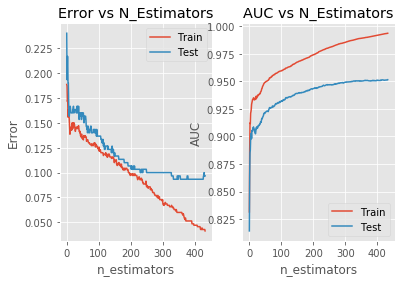

In [95]:
results2 = xgb2.evals_result()
fig = plt.figure()
plt.subplot(1,2,1)
plt.plot(results2['validation_0']['error'],label='Train')
plt.plot(results2['validation_1']['error'],label='Test')
plt.title('Error vs N_Estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results2['validation_0']['auc'],label='Train')
plt.plot(results2['validation_1']['auc'],label='Test')
plt.title('AUC vs N_Estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC');
plt.legend()
plt.grid(True)

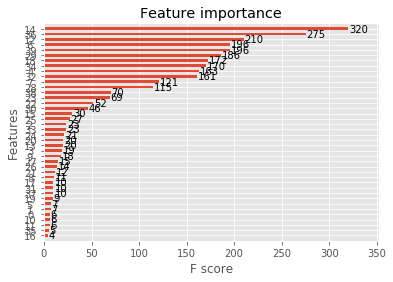

In [97]:
plot_importance(xgb2,height=0.5,max_num_features=40);

In [100]:
########################################################
###### Function to evaluate our model
########################################################
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]),
            metrics.accuracy_score(y_test, y_pred))

In [99]:
########################################################
###### Tune max_depth and min_child_weight n_Estimators
########################################################

#### Parameter Tuning ####
model = XGBClassifier()
param_dist = {"max_depth": [4,5,6,7,8,10],
              "min_child_weight" : [1,2,3],
              "n_estimators": [334],
              "learning_rate": [0.01],
              "gamma":[0,1],
              "colsample_bytree":[0.8,1]}

grid_search = GridSearchCV(model,
                           param_grid=param_dist,
                           cv = 3, 
                           verbose=10,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=2, missing=None, n_estimators=334,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [101]:
##################################################
###### Best Model: Training with X_train
##################################################

model = grid_search.best_estimator_

model.fit(X_train,y_train)

y_pred_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)

auc(model, X_train, X_test)

(0.9999754940001143, 0.9549757767011867, 0.9066666666666666)

In [102]:
##################################################
###### Best Model: Training with all the Data
##################################################

model = grid_search.best_estimator_


model.fit(X, y)

y_pred = model.predict(test)
y_pred_prob = model.predict_proba(test)[:,1]

In [103]:
submission = pd.DataFrame(y_pred)
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission.head()

(9000, 1)


,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [105]:
submission.to_csv('./submissions/sub_xgboost.csv',index=False)

# Future Work
___Try to Apply Gaussian Mixture and Grid Search to improve the accuracy___

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC

x_all = np.r_[train,test]
print('x_all shape :',x_all.shape)

# USING THE GAUSSIAN MIXTURE MODEL 
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
gmm_train = best_gmm.predict_proba(train)
gmm_test = best_gmm.predict_proba(test)


#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=99)

#USING GRID SEARCH
n_estimators = [10, 50, 100, 200,400]
max_depth = [3, 10, 20, 40]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 10,scoring='accuracy',n_jobs=-1).fit(gmm_train, train_labels.values.ravel())
rfc_best = grid_search_rfc.best_estimator_
print('Random Forest Best Score',grid_search_rfc.best_score_)
print('Random Forest Best Params',grid_search_rfc.best_params_)
print('Random Forest Accuracy',cross_val_score(rfc_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

#KNN 
knn = KNeighborsClassifier()

#USING GRID SEARCH
n_neighbors=[3,5,6,7,8,9,10]
param_grid = dict(n_neighbors=n_neighbors)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(gmm_train,train_labels.values.ravel())
knn_best = grid_search_knn.best_estimator_
print('KNN Best Score', grid_search_knn.best_score_)
print('KNN Best Params',grid_search_knn.best_params_)
print('KNN Accuracy',cross_val_score(knn_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

#SVM
from sklearn.svm import SVC
svc = SVC()

#USING GRID SEARCH
parameters = [{'kernel':['linear'],'C':[1,10,100]},
              {'kernel':['rbf'],'C':[1,10,100],'gamma':[0.05,0.0001,0.01,0.001]}]
grid_search_svm = GridSearchCV(estimator=svc, param_grid=parameters, cv = 10, n_jobs=-1,scoring='accuracy').fit(gmm_train, train_labels.values.ravel())
svm_best = grid_search_svm.best_estimator_
print('SVM Best Score',grid_search_svm.best_score_)
print('SVM Best Params',grid_search_svm.best_params_)
print('SVM Accuracy',cross_val_score(svm_best,gmm_train, train_labels.values.ravel(), cv=10).mean())

x_all shape : (10000, 40)
Random Forest Best Score 0.996
Random Forest Best Parmas {'max_depth': 3, 'n_estimators': 10}
Random Forest Accuracy 0.9960000000000001
KNN Best Score 0.996
KNN Best Params {'n_neighbors': 3}
KNN Accuracy 0.9960000000000001
SVM Best Score 0.996
SVM Best Params {'C': 1, 'kernel': 'linear'}
SVM Accuracy 0.9960000000000001


In [109]:
rfc_best.fit(gmm_train,train_labels.values.ravel())
pred  = rfc_best.predict(gmm_test)
rfc_best_pred = pd.DataFrame(pred)

rfc_best_pred.index += 1

rfc_best_pred.columns = ['Solution']
rfc_best_pred['Id'] = np.arange(1,rfc_best_pred.shape[0]+1)
rfc_best_pred = rfc_best_pred[['Id', 'Solution']]

rfc_best_pred.to_csv('./submissions/Submission_GMM_RFC.csv',index=False)